In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
from shapely.geometry import LineString
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from shapely import wkt
import numpy as np

In [2]:
fires_detected_path = "DATASETS/clusters_geodata.csv"
fires_detected = pd.read_csv(fires_detected_path)
fires_detected

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density,valid_cluster
0,-106.101831,41.012036,POINT (-106.1018314462117 41.01203557764756),0,33.696966,4844,1.357912,True
1,-119.253491,37.406694,POINT (-119.2534909324762 37.40669396784565),1,20.557596,1563,1.177236,True
2,-123.126757,40.202125,POINT (-123.1267570000001 40.20212474444448),2,32.382690,1032,0.313259,True
3,-118.648776,36.319483,POINT (-118.6487759811319 36.31948315094343),3,14.199432,530,0.836726,True
4,-121.185185,39.831447,POINT (-121.1851853989362 39.8314474468085),4,10.871931,378,1.017953,True
...,...,...,...,...,...,...,...,...
219,-109.048460,35.317210,POINT (-109.04846 35.31721),219,0.000000,1,inf,False
220,-111.717350,25.291730,POINT (-111.71735 25.29173),220,0.000000,1,inf,False
221,-113.452510,27.579600,POINT (-113.45251 27.5796),221,0.000000,1,inf,False
222,-120.656460,42.682140,POINT (-120.65646 42.68214),222,0.000000,1,inf,False


In [3]:
fires_detected['geometry'] = fires_detected['geometry'].apply(wkt.loads)

fires_detected_geodata = gpd.GeoDataFrame(fires_detected, geometry= fires_detected["geometry"])
fires_detected_geodata.crs = {'init': 'epsg:4326'}
fires_detected_geodata

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density,valid_cluster
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0,33.696966,4844,1.357912,True
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1,20.557596,1563,1.177236,True
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2,32.382690,1032,0.313259,True
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3,14.199432,530,0.836726,True
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4,10.871931,378,1.017953,True
...,...,...,...,...,...,...,...,...
219,-109.048460,35.317210,POINT (-109.04846 35.31721),219,0.000000,1,inf,False
220,-111.717350,25.291730,POINT (-111.71735 25.29173),220,0.000000,1,inf,False
221,-113.452510,27.579600,POINT (-113.45251 27.57960),221,0.000000,1,inf,False
222,-120.656460,42.682140,POINT (-120.65646 42.68214),222,0.000000,1,inf,False


In [4]:
ax = fires_detected_geodata.plot(figsize=(20,20))

In [5]:
cities_path = "DATASETS/USA_Cities_Towns.csv"
cities = pd.read_csv(cities_path)
cities

,X,Y,AREANAME,CLASS,ST
0,-85.253615,31.568118,Abbeville,city,AL
1,-86.957988,33.595648,Adamsville,city,AL
2,-87.177933,34.200042,Addison,town,AL
3,-87.738789,32.876246,Akron,town,AL
4,-86.824609,33.226662,Alabaster,city,AL
...,...,...,...,...,...
23429,-148.653701,60.792975,Whittier,city,AK
23430,-150.058552,61.740250,Willow,CDP,AK
23431,-152.670923,57.681547,Womens Bay,CDP,AK
23432,-132.273259,56.361259,Wrangell,city,AK


In [6]:
cities_geodata = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities["X"], cities["Y"]))
cities_geodata.crs = {'init': 'epsg:4326'}
cities_geodata

,X,Y,AREANAME,CLASS,ST,geometry
0,-85.253615,31.568118,Abbeville,city,AL,POINT (-85.25361 31.56812)
1,-86.957988,33.595648,Adamsville,city,AL,POINT (-86.95799 33.59565)
2,-87.177933,34.200042,Addison,town,AL,POINT (-87.17793 34.20004)
3,-87.738789,32.876246,Akron,town,AL,POINT (-87.73879 32.87625)
4,-86.824609,33.226662,Alabaster,city,AL,POINT (-86.82461 33.22666)
...,...,...,...,...,...,...
23429,-148.653701,60.792975,Whittier,city,AK,POINT (-148.65370 60.79297)
23430,-150.058552,61.740250,Willow,CDP,AK,POINT (-150.05855 61.74025)
23431,-152.670923,57.681547,Womens Bay,CDP,AK,POINT (-152.67092 57.68155)
23432,-132.273259,56.361259,Wrangell,city,AK,POINT (-132.27326 56.36126)


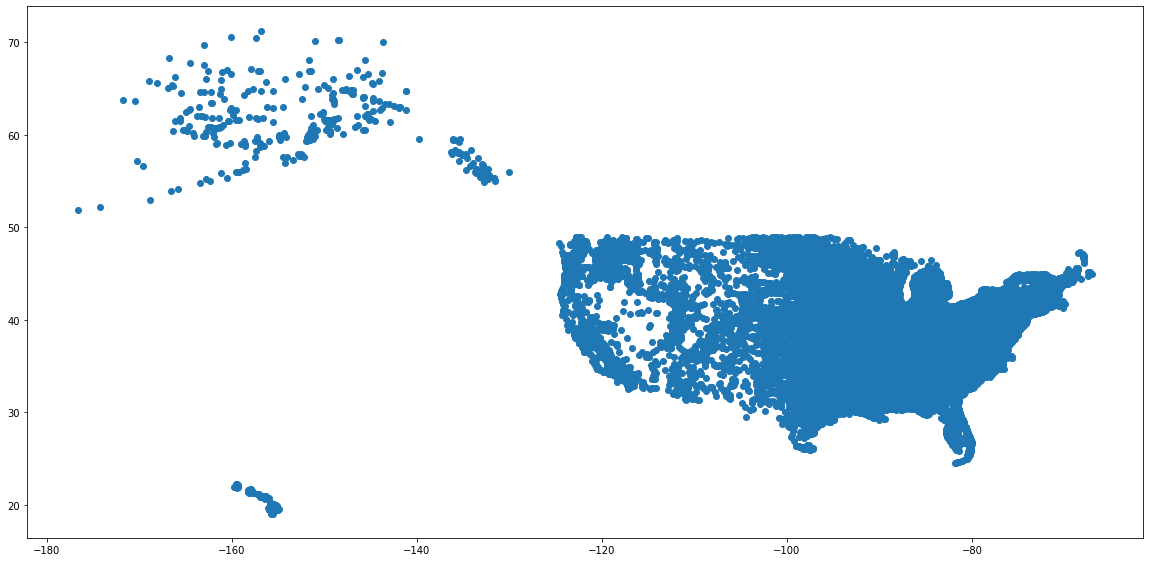

In [7]:
ax = cities_geodata.plot(figsize=(20,20))

In [8]:
fires_detected_geodata['mean_area'] = (3.1416 * (fires_detected_geodata['mean_distance'] ** 2))
fires_detected_geodata

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density,valid_cluster,mean_area
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0,33.696966,4844,1.357912,True,3567.241359
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1,20.557596,1563,1.177236,True,1327.686571
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2,32.382690,1032,0.313259,True,3294.402997
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3,14.199432,530,0.836726,True,633.421590
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4,10.871931,378,1.017953,True,371.333630
...,...,...,...,...,...,...,...,...,...
219,-109.048460,35.317210,POINT (-109.04846 35.31721),219,0.000000,1,inf,False,0.000000
220,-111.717350,25.291730,POINT (-111.71735 25.29173),220,0.000000,1,inf,False,0.000000
221,-113.452510,27.579600,POINT (-113.45251 27.57960),221,0.000000,1,inf,False,0.000000
222,-120.656460,42.682140,POINT (-120.65646 42.68214),222,0.000000,1,inf,False,0.000000


In [9]:
fires_report = fires_detected_geodata.drop(fires_detected_geodata[fires_detected_geodata.valid_cluster == False].index)
del fires_report['valid_cluster']
fires_report

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density,mean_area
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0,33.696966,4844,1.357912,3567.241359
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1,20.557596,1563,1.177236,1327.686571
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2,32.382690,1032,0.313259,3294.402997
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3,14.199432,530,0.836726,633.421590
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4,10.871931,378,1.017953,371.333630
...,...,...,...,...,...,...,...,...
178,-105.683040,25.045855,POINT (-105.68304 25.04585),178,0.128051,2,38.825066,0.051513
179,-106.583645,31.966605,POINT (-106.58365 31.96661),179,0.070992,2,126.315531,0.015833
180,-112.217255,31.143715,POINT (-112.21725 31.14372),180,0.083217,2,91.930198,0.021756
181,-116.281870,31.324720,POINT (-116.28187 31.32472),181,0.174104,2,21.002101,0.095229


In [10]:
temp = fires_report.drop(fires_report[fires_report.Cluster_id != 0].index)
temp = fires_report.iloc[0]
temp



X                                                    -106.102
Y                                                      41.012
geometry         POINT (-106.1018314462117 41.01203557764756)
Cluster_id                                                  0
mean_distance                                          33.697
num_fires                                                4844
mean_density                                          1.35791
mean_area                                             3567.24
Name: 0, dtype: object

In [11]:
distance = temp.geometry.distance(cities_geodata.iloc[0].geometry) * 111
print(distance)

2540.5078222968095


In [12]:
def calculate_distance_of_cities(reference, cities):
    
    near_cities = cities[["AREANAME"]].copy()
    distances = []
    
    for i in range(len(cities)):
        
        distance = reference.geometry.distance(cities.iloc[i].geometry) * 111
        distances.append(distance)
    
    near_cities['distance'] = np.array(distances)
    near_cities = near_cities.sort_values(by ='distance',ascending=True)
    near_cities.columns = ['city','distance']
    
    return near_cities.iloc[0:5].to_dict('list')

In [13]:
response_temp = calculate_distance_of_cities(temp, cities_geodata)
print(response_temp)

{'city': ['Walden', 'Laramie', 'Riverside', 'Grand Encampment', 'Rock River'], 'distance': [37.0630780753317, 66.40338513441127, 78.69055816839757, 80.00479924138358, 81.0890688125423]}


In [14]:
print(response_temp["city"][0])
print(response_temp["distance"][0])

Walden
37.0630780753317


In [15]:
near_cities = []

for i in range(len(fires_report)):
    
    fire = fires_report.iloc[i]
    
    city_distances = calculate_distance_of_cities(fire, cities_geodata)
    
    near_cities.append(city_distances)
    

In [16]:
fires_report['near_cities'] = near_cities
fires_report

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density,mean_area,near_cities
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0,33.696966,4844,1.357912,3567.241359,"{'city': ['Walden', 'Laramie', 'Riverside', 'G..."
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1,20.557596,1563,1.177236,1327.686571,"{'city': ['Mammoth Lakes', 'Oakhurst', 'Auberr..."
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2,32.382690,1032,0.313259,3294.402997,"{'city': ['Hayfork', 'Covelo', 'Lewiston', 'We..."
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3,14.199432,530,0.836726,633.421590,"{'city': ['East Porterville', 'Strathmore', 'L..."
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4,10.871931,378,1.017953,371.333630,"{'city': ['Quincy-East Quincy', 'Concow', 'Cha..."
...,...,...,...,...,...,...,...,...,...
178,-105.683040,25.045855,POINT (-105.68304 25.04585),178,0.128051,2,38.825066,0.051513,"{'city': ['Presidio', 'Marfa', 'Valentine', 'A..."
179,-106.583645,31.966605,POINT (-106.58365 31.96661),179,0.070992,2,126.315531,0.015833,"{'city': ['Westway', 'Vinton', 'Anthony', 'Ant..."
180,-112.217255,31.143715,POINT (-112.21725 31.14372),180,0.083217,2,91.930198,0.021756,"{'city': ['Sells', 'Pisinemo', 'Santa Rosa', '..."
181,-116.281870,31.324720,POINT (-116.28187 31.32472),181,0.174104,2,21.002101,0.095229,"{'city': ['Imperial Beach', 'Chula Vista', 'Ja..."


In [17]:
print(fires_report.iloc[0]["near_cities"]["city"][0])
print(fires_report.iloc[0]["near_cities"]["distance"][0])

Walden
37.0630780753317


In [18]:
fire_clusterized_path = "DATASETS/fire_clusterized_geodata.csv"
fire_clusterized = pd.read_csv(fire_clusterized_path)

fire_clusterized['geometry'] = fire_clusterized['geometry'].apply(wkt.loads)

fire_clusterized_geodata = gpd.GeoDataFrame(fire_clusterized, geometry= fire_clusterized["geometry"])
fire_clusterized_geodata.crs = {'init': 'epsg:4326'}
fire_clusterized_geodata


,latitude,longitude,date,hour,geometry,Cluster_label
0,40.70000,-105.73700,2020-09-26,435,POINT (-105.73700 40.70000),0
1,41.08900,-106.29900,2020-09-26,435,POINT (-106.29900 41.08900),0
2,41.08400,-106.32300,2020-09-26,435,POINT (-106.32300 41.08400),0
3,41.13500,-106.14300,2020-09-26,435,POINT (-106.14300 41.13500),0
4,41.13000,-106.16700,2020-09-26,435,POINT (-106.16700 41.13000),0
...,...,...,...,...,...,...
12070,19.56577,-92.23937,2020-09-27,1830,POINT (-92.23937 19.56577),21
12071,19.58750,-92.20234,2020-09-27,1830,POINT (-92.20234 19.58750),21
12072,19.59876,-92.29350,2020-09-27,1830,POINT (-92.29350 19.59876),21
12073,27.87473,-81.76313,2020-09-27,1830,POINT (-81.76313 27.87473),57


In [19]:
m_1 = folium.Map(location=[35,-95], tiles='openstreetmap', zoom_start=4)

for i in range(len(fires_report)):
    
        
    html="""
        <h3 align="center"> Fire Alert! </h3><br>

        <code>
            Latitude:  """ + str(round(fires_report.iloc[i]['Y'], 10)) + """<br>
            Longitude: """ + str(round(fires_report.iloc[i]['X'], 10)) + """ <br>
            Affected Area: """ + str(round(fires_report.iloc[i]['mean_area'], 2)) + """ km2 <br>
            Heat points detected: """ + str(round(fires_report.iloc[i]['num_fires'], 2)) + """ <br>
        </code>
        </p>
        """
    
    html="""
        <h3 align="center"> Fire Alert! </h3><br>

        <code>
            Latitude:  """ + str(round(fires_report.iloc[i]['Y'], 10)) + """<br>
            Longitude: """ + str(round(fires_report.iloc[i]['X'], 10)) + """ <br>
            Affected Area: """ + str(round(fires_report.iloc[i]['mean_area'], 2)) + """ km2 <br>
            Heat points detected: """ + str(round(fires_report.iloc[i]['num_fires'], 2)) + """ <br>
            Near cities: <br>
            
            <table style="width:100%">
            
              <tr>
                <th>City Name</th>
                <th>Distance</th>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][0])+"""</td>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["distance"][0])+"""</td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][1])+"""</td>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["distance"][1])+"""</td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][2])+"""</td>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["distance"][2])+"""</td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][3])+"""</td>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["distance"][3])+"""</td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][4])+"""</td>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["distance"][4])+"""</td>
              </tr>
 
              
            </table>
            
            
            
        </code>
        </p>
        """

    
    
    iframe = folium.IFrame(html=html, width=350, height=300)
    popup = folium.Popup(iframe, max_width=2650)

    Marker(
        [fires_report.iloc[i]['Y'], fires_report.iloc[i]['X']],
        #popup='Fire Alert!'+ 'Latitude:'+ str(clusters_geodata.iloc[i]['Y']) + 'Longitude:' + str(clusters_geodata.iloc[i]['X']),
        popup = popup,
        icon=folium.Icon(color='red', icon='info-sign')

    ).add_to(m_1)

    Circle(
        location=[fires_report.iloc[i]['Y'], fires_report.iloc[i]['X']],
        radius=fires_report.iloc[i]["mean_distance"]*1000,
        color='darkred',
        fill=True,
        fill_color='darkred'
    ).add_to(m_1)

    
HeatMap(data=fire_clusterized_geodata[['latitude', 'longitude']], radius=9).add_to(m_1)

m_1

In [20]:
fires_report

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density,mean_area,near_cities
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0,33.696966,4844,1.357912,3567.241359,"{'city': ['Walden', 'Laramie', 'Riverside', 'G..."
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1,20.557596,1563,1.177236,1327.686571,"{'city': ['Mammoth Lakes', 'Oakhurst', 'Auberr..."
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2,32.382690,1032,0.313259,3294.402997,"{'city': ['Hayfork', 'Covelo', 'Lewiston', 'We..."
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3,14.199432,530,0.836726,633.421590,"{'city': ['East Porterville', 'Strathmore', 'L..."
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4,10.871931,378,1.017953,371.333630,"{'city': ['Quincy-East Quincy', 'Concow', 'Cha..."
...,...,...,...,...,...,...,...,...,...
178,-105.683040,25.045855,POINT (-105.68304 25.04585),178,0.128051,2,38.825066,0.051513,"{'city': ['Presidio', 'Marfa', 'Valentine', 'A..."
179,-106.583645,31.966605,POINT (-106.58365 31.96661),179,0.070992,2,126.315531,0.015833,"{'city': ['Westway', 'Vinton', 'Anthony', 'Ant..."
180,-112.217255,31.143715,POINT (-112.21725 31.14372),180,0.083217,2,91.930198,0.021756,"{'city': ['Sells', 'Pisinemo', 'Santa Rosa', '..."
181,-116.281870,31.324720,POINT (-116.28187 31.32472),181,0.174104,2,21.002101,0.095229,"{'city': ['Imperial Beach', 'Chula Vista', 'Ja..."


In [26]:
fires_report['timber_losses'] = (fires_detected_geodata['mean_area'] * 1200)
fires_report['fire_supression_losses'] = (fires_detected_geodata['mean_area'] * 200)
fires_report['property_losses'] = (fires_detected_geodata['mean_area'] * 2000)
fires_report['total_losses'] = fires_report['timber_losses'] + fires_report['fire_supression_losses'] + fires_report['property_losses']
fires_report

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density,mean_area,near_cities,timber_losses,fire_supression_losses,property_losses,total_losses
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0,33.696966,4844,1.357912,3567.241359,"{'city': ['Walden', 'Laramie', 'Riverside', 'G...",4.280690e+06,713448.271742,7.134483e+06,1.212862e+07
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1,20.557596,1563,1.177236,1327.686571,"{'city': ['Mammoth Lakes', 'Oakhurst', 'Auberr...",1.593224e+06,265537.314291,2.655373e+06,4.514134e+06
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2,32.382690,1032,0.313259,3294.402997,"{'city': ['Hayfork', 'Covelo', 'Lewiston', 'We...",3.953284e+06,658880.599489,6.588806e+06,1.120097e+07
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3,14.199432,530,0.836726,633.421590,"{'city': ['East Porterville', 'Strathmore', 'L...",7.601059e+05,126684.318023,1.266843e+06,2.153633e+06
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4,10.871931,378,1.017953,371.333630,"{'city': ['Quincy-East Quincy', 'Concow', 'Cha...",4.456004e+05,74266.725985,7.426673e+05,1.262534e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-105.683040,25.045855,POINT (-105.68304 25.04585),178,0.128051,2,38.825066,0.051513,"{'city': ['Presidio', 'Marfa', 'Valentine', 'A...",6.181574e+01,10.302623,1.030262e+02,1.751446e+02
179,-106.583645,31.966605,POINT (-106.58365 31.96661),179,0.070992,2,126.315531,0.015833,"{'city': ['Westway', 'Vinton', 'Anthony', 'Ant...",1.900004e+01,3.166673,3.166673e+01,5.383344e+01
180,-112.217255,31.143715,POINT (-112.21725 31.14372),180,0.083217,2,91.930198,0.021756,"{'city': ['Sells', 'Pisinemo', 'Santa Rosa', '...",2.610676e+01,4.351127,4.351127e+01,7.396916e+01
181,-116.281870,31.324720,POINT (-116.28187 31.32472),181,0.174104,2,21.002101,0.095229,"{'city': ['Imperial Beach', 'Chula Vista', 'Ja...",1.142743e+02,19.045714,1.904571e+02,3.237771e+02


In [31]:
m_1 = folium.Map(location=[35,-95], tiles='openstreetmap', zoom_start=4)

for i in range(len(fires_report)):
    
    
    html="""
        <h3 align="center"> Fire Alert! </h3><br>

        <code>
            Latitude:  """ + str(round(fires_report.iloc[i]['Y'], 10)) + """<br>
            Longitude: """ + str(round(fires_report.iloc[i]['X'], 10)) + """ <br>
            Estimated affected Area: """ + str(round(fires_report.iloc[i]['mean_area'], 2)) + """ km2 <br>
            Heat points detected: """ + str(round(fires_report.iloc[i]['num_fires'], 2)) + """ <br>
            <br>
            Near cities: <br>
            
            <table style="width:100%">
            
              <tr>
                <th>City Name</th>
                <th>Distance</th>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][0])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][0], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][1])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][1], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][2])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][2], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][3])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][3], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][4])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][4], 2))+"""  km </td>
              </tr>
 
              
            </table>
            <br>
            
            
            Estimated economic losses: <br>
            
             <table style="width:100%">
            
              <tr>
                <th>Cost Type</th>
                <th>Estimated Cost</th>
              </tr>
              
              <tr>
                <td> Timber </td>
                <td> $"""+ str(round(fires_report.iloc[i]['timber_losses'], 1)) +""" </td>
              </tr>
              
              <tr>
                <td> Fire Suppression</td>
                <td> $"""+  str(round(fires_report.iloc[i]['fire_supression_losses'], 1)) +"""</td>
              </tr>
              
              <tr>
                <td> Property Losses </td>
                <td> $"""+  str(round(fires_report.iloc[i]['property_losses'], 1)) +"""</td>
              </tr>
              
              <tr>
                <td> Total Losses </td>
                <td> $"""+  str(round(fires_report.iloc[i]['total_losses'], 1)) +"""</td>
              </tr>
              
            </table>
            <br>
            
            
        </code>
        </p>
        """

    
    
    iframe = folium.IFrame(html=html, width=350, height=300)
    popup = folium.Popup(iframe, max_width=2650)

    Marker(
        [fires_report.iloc[i]['Y'], fires_report.iloc[i]['X']],
        #popup='Fire Alert!'+ 'Latitude:'+ str(clusters_geodata.iloc[i]['Y']) + 'Longitude:' + str(clusters_geodata.iloc[i]['X']),
        popup = popup,
        icon=folium.Icon(color='red', icon='info-sign')

    ).add_to(m_1)

    Circle(
        location=[fires_report.iloc[i]['Y'], fires_report.iloc[i]['X']],
        radius=fires_report.iloc[i]["mean_distance"]*1000,
        color='darkred',
        fill=True,
        fill_color='darkred'
    ).add_to(m_1)

    
HeatMap(data=fire_clusterized_geodata[['latitude', 'longitude']], radius=9).add_to(m_1)

m_1

In [33]:
m_1 = folium.Map(location=[35,-95], tiles='openstreetmap', zoom_start=4)

for i in range(len(fires_report)):
    
    
    html="""
    
        <head>
        <style>
        table {
          border-collapse: collapse;
          width: 100%;
        }

        th, td {
          text-align: left;
          padding: 8px;
        }

        tr:nth-child(even){background-color: #f2f2f2}

        th {
          background-color: #4CAF50;
          color: white;
        }
        </style>
        </head>
        
        <h3 align="center"> Fire Alert! </h3><br>

        <code>
            Latitude:  """ + str(round(fires_report.iloc[i]['Y'], 10)) + """<br>
            Longitude: """ + str(round(fires_report.iloc[i]['X'], 10)) + """ <br>
            Estimated affected Area: """ + str(round(fires_report.iloc[i]['mean_area'], 2)) + """ km2 <br>
            Heat points detected: """ + str(round(fires_report.iloc[i]['num_fires'], 2)) + """ <br>
            <br>
            Near cities: <br>
            
            <table style="width:100%">
            
              <tr>
                <th>City Name</th>
                <th>Distance</th>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][0])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][0], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][1])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][1], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][2])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][2], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][3])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][3], 2))+"""  km </td>
              </tr>
              
              <tr>
                <td>"""+ str(fires_report.iloc[i]["near_cities"]["city"][4])+"""</td>
                <td>"""+ str(round(fires_report.iloc[i]["near_cities"]["distance"][4], 2))+"""  km </td>
              </tr>
 
              
            </table>
            <br>
            
            
            Estimated economic losses: <br>
            
             <table style="width:100%">
            
              <tr>
                <th>Cost Type</th>
                <th>Estimated Cost</th>
              </tr>
              
              <tr>
                <td> Timber </td>
                <td> $"""+ str(round(fires_report.iloc[i]['timber_losses'], 1)) +""" </td>
              </tr>
              
              <tr>
                <td> Fire Suppression</td>
                <td> $"""+  str(round(fires_report.iloc[i]['fire_supression_losses'], 1)) +"""</td>
              </tr>
              
              <tr>
                <td> Property Losses </td>
                <td> $"""+  str(round(fires_report.iloc[i]['property_losses'], 1)) +"""</td>
              </tr>
              
              <tr>
                <td> Total Losses </td>
                <td> $"""+  str(round(fires_report.iloc[i]['total_losses'], 1)) +"""</td>
              </tr>
              
            </table>
            <br>
            
            
        </code>
        </p>
        """

    
    
    iframe = folium.IFrame(html=html, width=350, height=300)
    popup = folium.Popup(iframe, max_width=2650)

    Marker(
        [fires_report.iloc[i]['Y'], fires_report.iloc[i]['X']],
        #popup='Fire Alert!'+ 'Latitude:'+ str(clusters_geodata.iloc[i]['Y']) + 'Longitude:' + str(clusters_geodata.iloc[i]['X']),
        popup = popup,
        icon=folium.Icon(color='red', icon='info-sign')

    ).add_to(m_1)

    Circle(
        location=[fires_report.iloc[i]['Y'], fires_report.iloc[i]['X']],
        radius=fires_report.iloc[i]["mean_distance"]*1000,
        color='darkred',
        fill=True,
        fill_color='darkred'
    ).add_to(m_1)

    
HeatMap(data=fire_clusterized_geodata[['latitude', 'longitude']], radius=9).add_to(m_1)

m_1

In [34]:
m_1.save('mapa_test.html')